In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
path = os.path.join(os.path.join(os.path.dirname(os.getcwd())), "db.sqlite3")
connection = sqlite3.connect(path)
sql_query = """ SELECT
                    restaurant_orderitem.order_id AS OrderID,
                    restaurant_product.name AS ProductName,
                    restaurant_product.price AS ProductPrice,
                    restaurant_orderitem.quantity AS ProductQuantity,
                    restaurant_order.datetime AS OrderDateTime
                FROM restaurant_orderitem
                LEFT JOIN restaurant_order
                ON restaurant_orderitem.order_id == restaurant_order.id
                LEFT JOIN restaurant_product
                ON restaurant_orderitem.product_id = restaurant_product.id
                  """
data = pd.read_sql_query(sql_query, connection)

data.to_csv("data.csv", index=False)
connection.close()
data = pd.read_csv("data.csv")
df = pd.DataFrame(data)
df.shape[0]

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

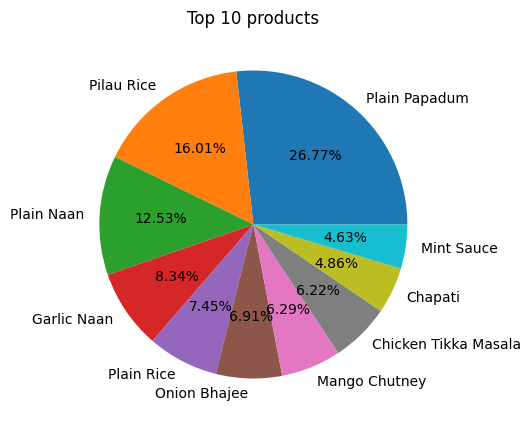

In [3]:
top_products = df.groupby("ProductName")["ProductQuantity"].sum().nlargest(10, "all")
plt.figure(figsize=(5, 5))
plt.pie(top_products, labels=top_products.index, autopct="%.2f%%")
plt.title("Top 10 products")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

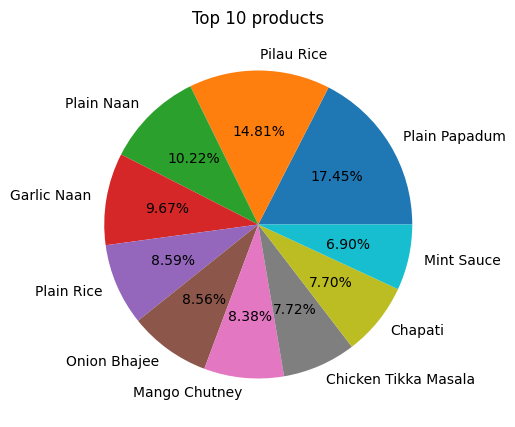

In [4]:
df["Item Price"] = df["ProductPrice"] * df["ProductQuantity"]
top_orders = df.groupby("ProductName")["Item Price"].sum().nlargest(10, "all")
plt.figure(figsize=(5, 5))
plt.pie(top_orders, labels=top_products.index, autopct="%.2f%%")
plt.title("Top 10 products")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

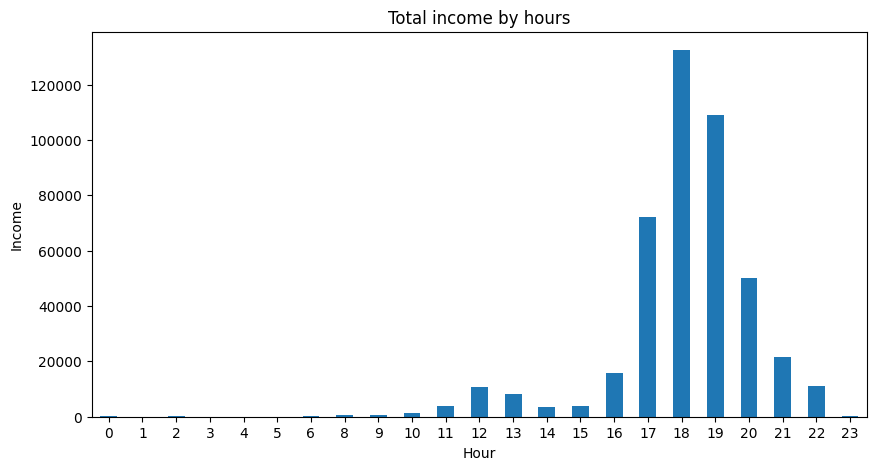

In [5]:
df["OrderDateTime"] = pd.to_datetime(df["OrderDateTime"])
df["Order Hour"] = df["OrderDateTime"].dt.hour
hours = df.groupby("Order Hour")["Item Price"].sum()

plt.figure(figsize=(10, 5))
hours.plot(kind="bar")
plt.title("Total income by hours")
plt.xlabel("Hour")
plt.ylabel("Income")
plt.xticks(rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

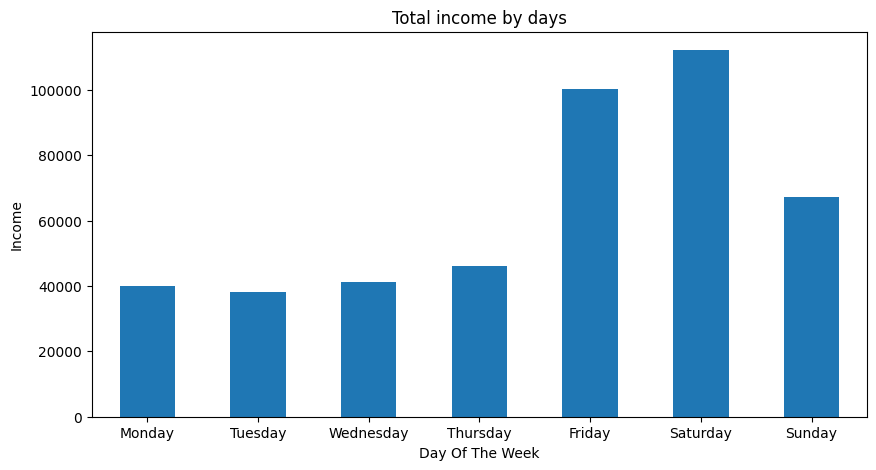

In [6]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df["Order Day"] = df["OrderDateTime"].dt.day_name()
days = df.groupby("Order Day")["Item Price"].sum().reindex(cats) 

plt.figure(figsize=(10, 5))
days.plot(kind="bar")
plt.title("Total income by days")
plt.xlabel("Day Of The Week")
plt.ylabel("Income")
plt.xticks(rotation=0)
plt.show()